In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# How to bootstrap

In [8]:
import random
N = 1000
polling = [random.randint(1,100) for i in range(N)]
len(polling)

1000

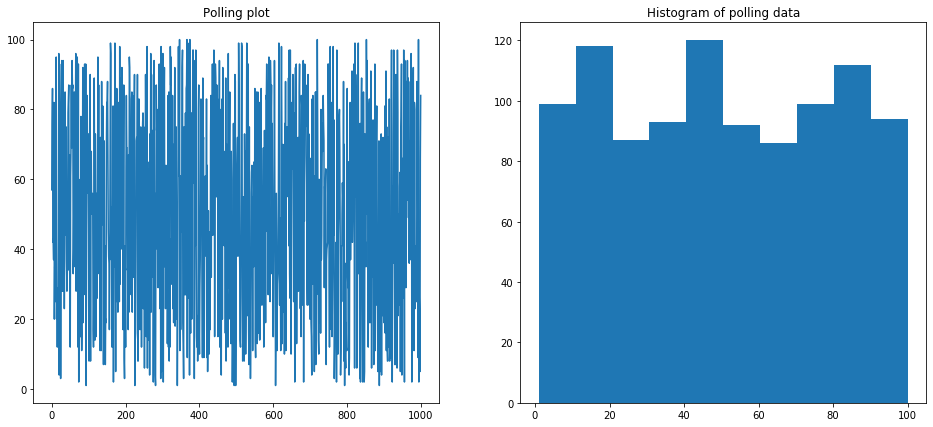

In [13]:
fig = plt.figure(figsize=(16,7))
plt.subplot(121)
plt.title('Polling plot')
_ = plt.plot(polling)
plt.subplot(122)
plt.title('Histogram of polling data')
_ = plt.hist(polling, bins=10)

In [16]:
# Statistical KPIs
poll_mean = np.mean(polling)
poll_std = np.std(polling)
print('Mean value of polling %d, standard deviation %d' % (poll_mean, poll_std))

Mean value of polling 50, standard deviation 28


In [17]:
# Bootstrap N values
bootstrap = [random.choice(polling) for i in range(N)]
len(bootstrap)

1000

In [18]:
# Statistical KPIs of one bootstrap
boot_mean = np.mean(bootstrap)
boot_std = np.std(bootstrap)
print('Mean value of bootstrap %d, standard deviation %d' % (boot_mean, boot_std))

Mean value of bootstrap 48, standard deviation 28


In [25]:
# Take 100 bootstrap samples and compare means and standard deviations
def bootstrap_mean_std(data):
    bootstrap = [random.choice(data) for i in range(len(data))]
    temp_mean = np.mean(bootstrap)
    temp_std = np.std(bootstrap)
    
    return temp_mean, temp_std

arr_mean = []
arr_std = []
for i in range(100):
    x, y = bootstrap_mean_std(polling)
    arr_mean.append(x)
    arr_std.append(y)


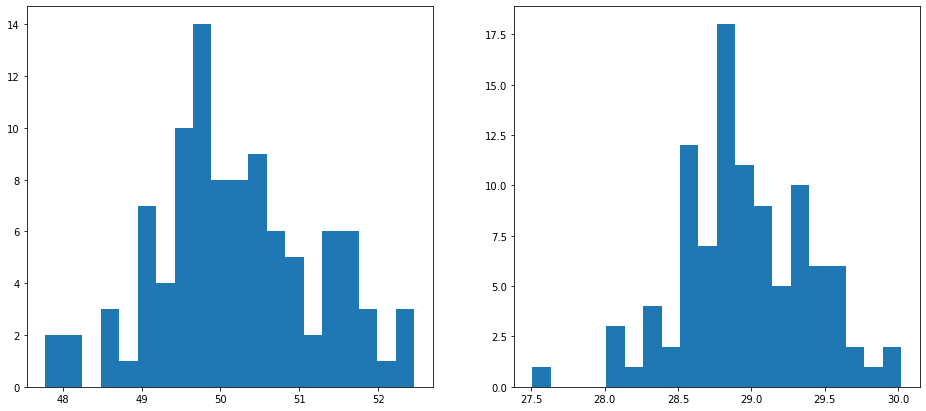

In [28]:
# Plot the distribution of means and standard deviations
fig = plt.figure(figsize=(16,7))
plt.subplot(121)
_ = plt.hist(arr_mean, bins=20)
plt.subplot(122)
_ = plt.hist(arr_std, bins=20)

# How to work with p-values
## Statistical significance & confidence intervals
chi-squared tests for statistical significance: https://mixpanel.com/topics/statistical-significance/
In depth explanation of statistical significance: https://blog.prepscholar.com/statistical-significance-definition

In [29]:
# Take a random number between 1 och 100 and measure the probability that such a value is achieved
rnd = random.randint(0, 100)

The p-value is the probability that we observe a specific observation given the null-hypothesis

In [30]:
def p_value(obs, samples):
    gt = [val for val in samples if val >= obs]
    p_val = len(gt) / len(samples)
    return p_val

In [32]:
p_val = p_value(rnd, polling)
print('The observation %d has a p-value of %f' % (rnd, p_val))

The observation 26 has a p-value of 0.746000


## Chi-squared test
Used for determening whether or not an A/B test showed statistically significant results.

In [37]:
# A company redesigns its home page and measures how many users continued to browse the page vs. how many users 
# left their platform. Old page is A, and new page is B
A_stayed = 1234
A_left = 4521
B_stayed = 1322
B_left = 4123
tot_stayed = A_stayed + B_stayed
tot_left = A_left + B_left
tot_A = A_stayed + A_left
tot_B = B_stayed + B_left
total = tot_A + tot_B

In [38]:
# For the chi-squared test, we calculate what we expect to see if there was no difference
xA_stayed = (tot_A * tot_stayed) / total
xA_left = (tot_A * tot_left) / total
xB_stayed = (tot_B * tot_stayed) / total
xB_left = (tot_B * tot_left) / total

In [44]:
test = np.matrix([[A_stayed, B_stayed], [A_left, B_left]])
expected = np.matrix([[xA_stayed, xB_stayed], [xA_left, xB_left]])
print(test)
print(expected)

[[1234 1322]
 [4521 4123]]
[[1313.37321429 1242.62678571]
 [4441.62678571 4202.37321429]]


In [59]:
# chi-matrix
# (expected - observed)^2 / expected
def chitwo(x, y):
    return (x - y)**2 / x

chi = np.matrix([[chitwo(expected[0,0],test[0,0]), chitwo(expected[0, 1],test[0,1])],
                        [chitwo(expected[1,0], test[1,0]), chitwo(expected[1,1],test[1,1])]])
print(chi)

[[4.79689023 5.06999142]
 [1.41842335 1.4991784 ]]


In [62]:
sum(chi)

matrix([[6.21531358, 6.56916982]])